From [this blog](https://blogs2.datall-analyse.nl/2016/02/17/extreme_value_analysis_maxima/#more-120).

The equations are [here](https://raw.githubusercontent.com/RInterested/SIMULATIONS_and_PROOFS/master/Frechet).

In [ ]:
install.packages('e1071')
require(e1071)

install.packages('survival')
require(survival)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: e1071

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: survival



The R functions for performing the extreme value analysis (for maxima) can be downloaded from [here]("http://www.datall-analyse.nl/R/eva_max.R").

The dataset is from Castillo et al., Table 1.1, p. 9-10: yearly maximum wind speed (in miles/hour).

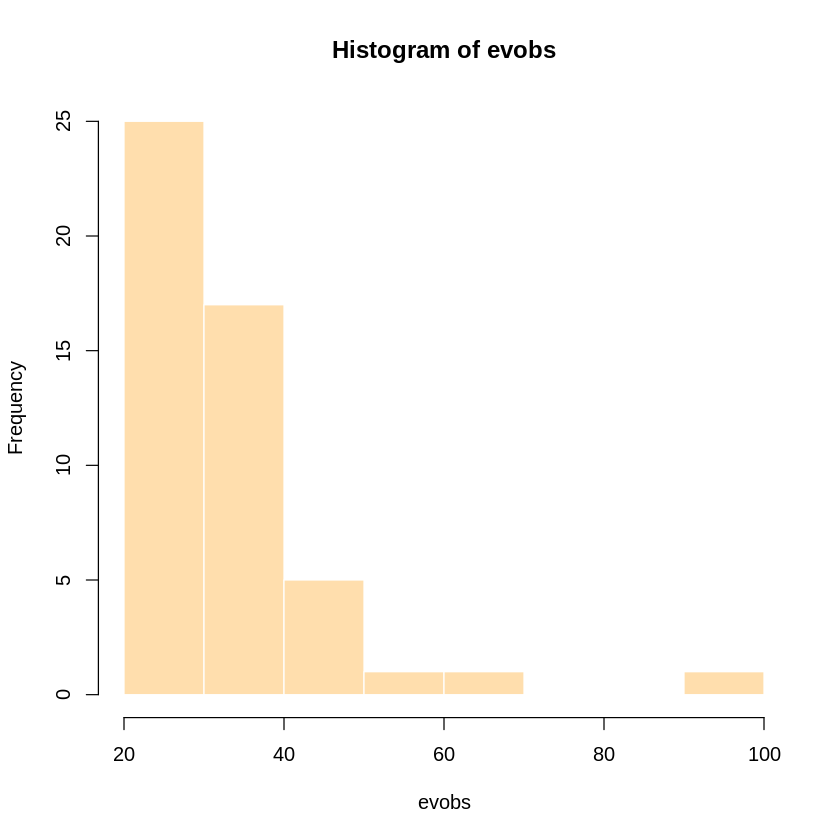

In [ ]:
evobs <- scan("https://raw.githubusercontent.com/RInterested/DATASETS/gh-pages/wind")

#explore data visually

options(repr.plot.width=7, repr.plot.height=7)
hist(evobs, border=F, col='navajowhite')

MLE of Gumbel parameters:

In [ ]:
install.packages("extRemes")
require(extRemes)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: extRemes

Loading required package: Lmoments

Loading required package: distillery


Attaching package: ‘extRemes’


The following objects are masked from ‘package:stats’:

    qqnorm, qqplot




In [ ]:
#Gumbel
gumbelmod <- fevd(x=evobs, type="Gumbel", method="MLE")
summary(gumbelmod)

muG <- gumbelmod$results$par[1]
sigmaG <- gumbelmod$results$par[2]


fevd(x = evobs, type = "Gumbel", method = "MLE")

[1] "Estimation Method used: MLE"


 Negative Log-Likelihood Value:  179.291 


 Estimated parameters:
 location     scale 
29.448377  6.728403 

 Standard Error Estimates:
 location     scale 
0.9864810 0.8118861 

 Estimated parameter covariance matrix.
          location    scale
location 0.9731448 0.211273
scale    0.2112730 0.659159

 AIC = 362.5819 

 BIC = 366.406 


MLE of log-Frechet distribution:

If the density function for a $\color{red}{\text{Fréchet}}$ random variable $T$, with the lower bound fixed at nought (natural bound for wind speed), i.e. with $\color{red}{\text{no location}}$ parameter, but otherwise parametrized with $\color{red}{\text{scale } \sigma}$ and $\color{red}{\text{shape } \xi}$, is

$$f_T(t) = \xi\cdot\left(\frac{t}{\sigma}\right)^{-(\xi+1)} \cdot \exp\left[-\left(\frac{t}{\sigma}\right)^{-\xi}\right],$$

given $s = \log(t),$

$$\begin{align}
f_S(s) &= \xi\cdot\left(\frac{\exp s}{\sigma}\right)^{-(\xi+1)} \cdot \exp\left[-\left(\frac{\exp s}{\sigma}\right)^{-\xi}\right] \cdot \left| \frac{\operatorname{d}\exp s}{\operatorname{d}s} \right| \\
&= \xi\cdot \exp \{-\xi (s-\log\sigma) - \exp[-\xi (s-\log\sigma)]\}
\end{align}
$$

the log-Fr&eacute;chet distribution will have $\color{orange}{\text{location }\log\sigma}$ and parameter $\color{orange}{\text{scale }\frac{1}{\xi}}$.

In [ ]:
install.packages('SPREDA')
require('SPREDA')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: SPREDA

Loading required package: nlme



In [ ]:
#Fréchet
frechetmod <- Lifedata.MLE(Surv(evobs) ~ 1, dist="frechet")
frechetmod

(muF <- coef(frechetmod)[1])
(sigmaF <- coef(frechetmod)[2])

Call:
model.frame(formula = Surv(evobs) ~ 1)

Coefficients:
(Intercept)    logsigma 
  3.3579367   0.1957559 

Loglikelihod:
-173.4035 (df=2)

(Intercept) 
   3.357937

sigma 
0.1957559

Therefore, the parameters for the Frechet will be

$\text{scale }\color{red}\sigma=\exp(\text{Intercept})=\exp( 3.3579367)= 28.72985.$

$\text{shape }\color{red}\xi=\frac 1 {\text{logsigma}}=\frac 1{ 0.1957559 }= 5.10840.$

Probability plot for largest values (maxima) with Gumbel and Fréchet distribution (side by side):





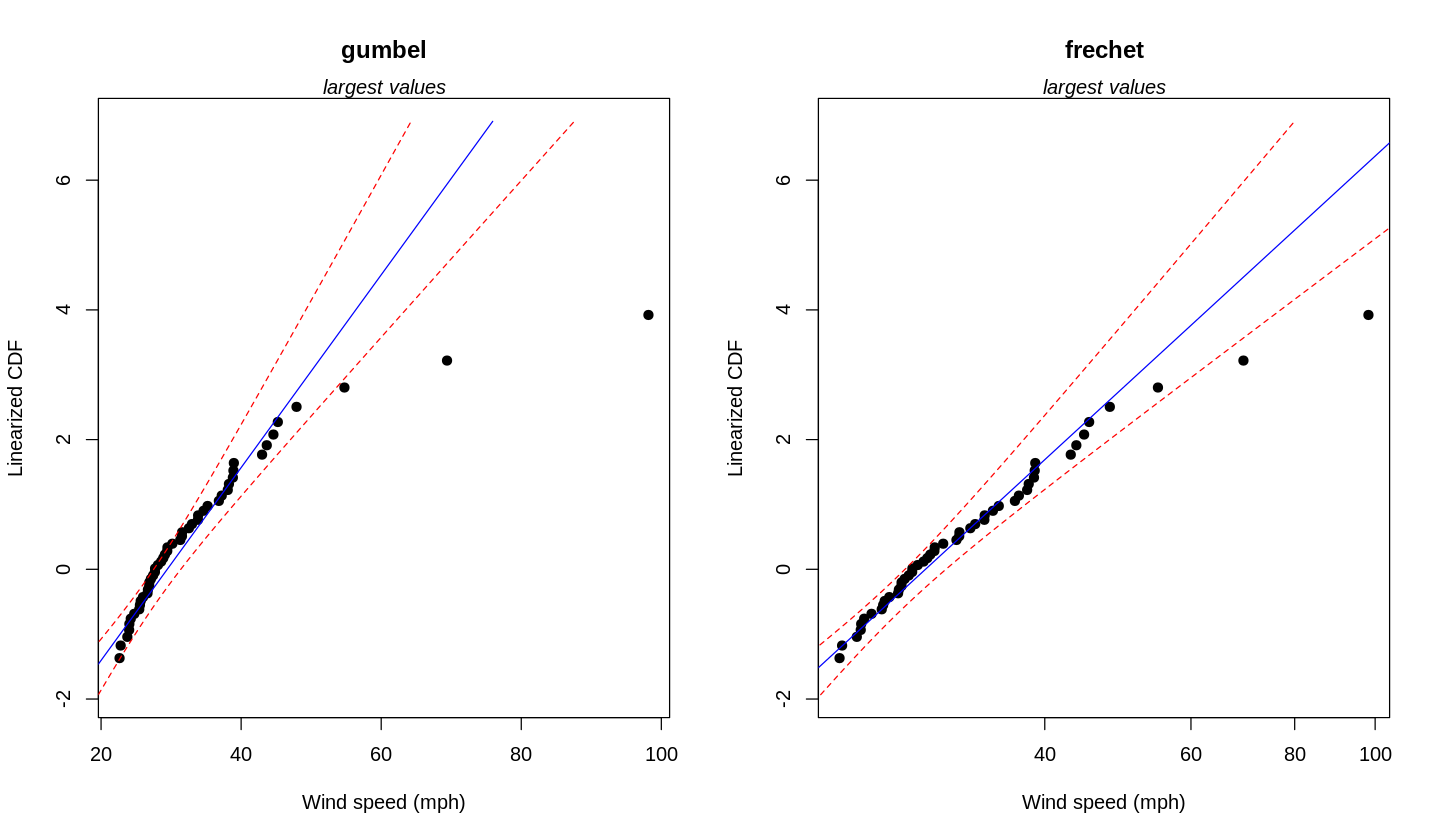

In [ ]:
par(mfrow=c(1, 2))
options(repr.plot.width=12, repr.plot.height=7)

source("https://raw.githubusercontent.com/RInterested/SIMULATIONS_and_PROOFS/master/Frechet")

probplot(values=evobs, model=gumbelmod, varname="Wind speed (mph)",
         alpha=1-.95, dist="gumbel")
probplot(values=evobs, model=frechetmod, varname="Wind speed (mph)",
         alpha=1-.95, dist="frechet")

Note: for the wind data, a **return period** of $20$ means that once every $20$ years the wind speed is (on average) expected to be larger than $949.4 \text{mph}$ (in case of a Gumbel distribution), or $51.4 \text{mph}$ (in case of a Fréchet distribution)
(this expected wind speed is also called the **return level**).

For the Gumbel the return level is calculated by

$$X_T =\mu - \sigma \log\left(-\log\left(1 - \frac 1 T\right) \right)$$

as found [here](https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/2009WR008517).

For the Fréchet it is calculated as

$$X_T=\mu +\frac{\sigma\left( 1 - \left( -\log\left(1-1/T \right)\right)^\xi\right)}{\xi}$$

In [ ]:
# Gumbel:

muG
sigmaG
xi    <-  0 # By definition of the Gumbel
Time  <-  20

muG - sigmaG * log(-log(1 - 1/Time))

location 
29.44838

scale 
6.728403

location 
49.43305

In [ ]:
# Gumbel (text):
return.level(gumbelmod, return.period =20)

fevd(x = evobs, type = "Gumbel", method = "MLE")
get(paste("return.level.fevd.", newcl, sep = ""))(x = x, return.period = return.period)

 Gumbel model fitted to  evobs  
Data are assumed to be  stationary 
[1] "Return Levels for period units in years"
20-year level 
     49.43305 

In [ ]:
# Frechet: Manually calculation:

alpha <- 1/sigmaF
beta <- exp(muF)
xi <- -1/alpha
sigma <- -beta * xi
tau <- 0 # Tau is the lower bound on X, not mu.
mu <- tau - sigma/xi
T <- 20

mu + sigma*(1-(-log(1-1/T))^xi)/xi

(Intercept) 
   51.38622

In [ ]:
# qlev() quantiles of The Standard Largest Extreme Value Distribution
# https://cran.rstudio.com/web/packages/SPREDA/SPREDA.pdf
# https://variation.com/wp-content/distribution_analyzer_help/hs123.htm


exp(muF+qlev(1-1/20)*sigmaF)

(Intercept) 
   51.38622

#### DIAGNOSTICS:

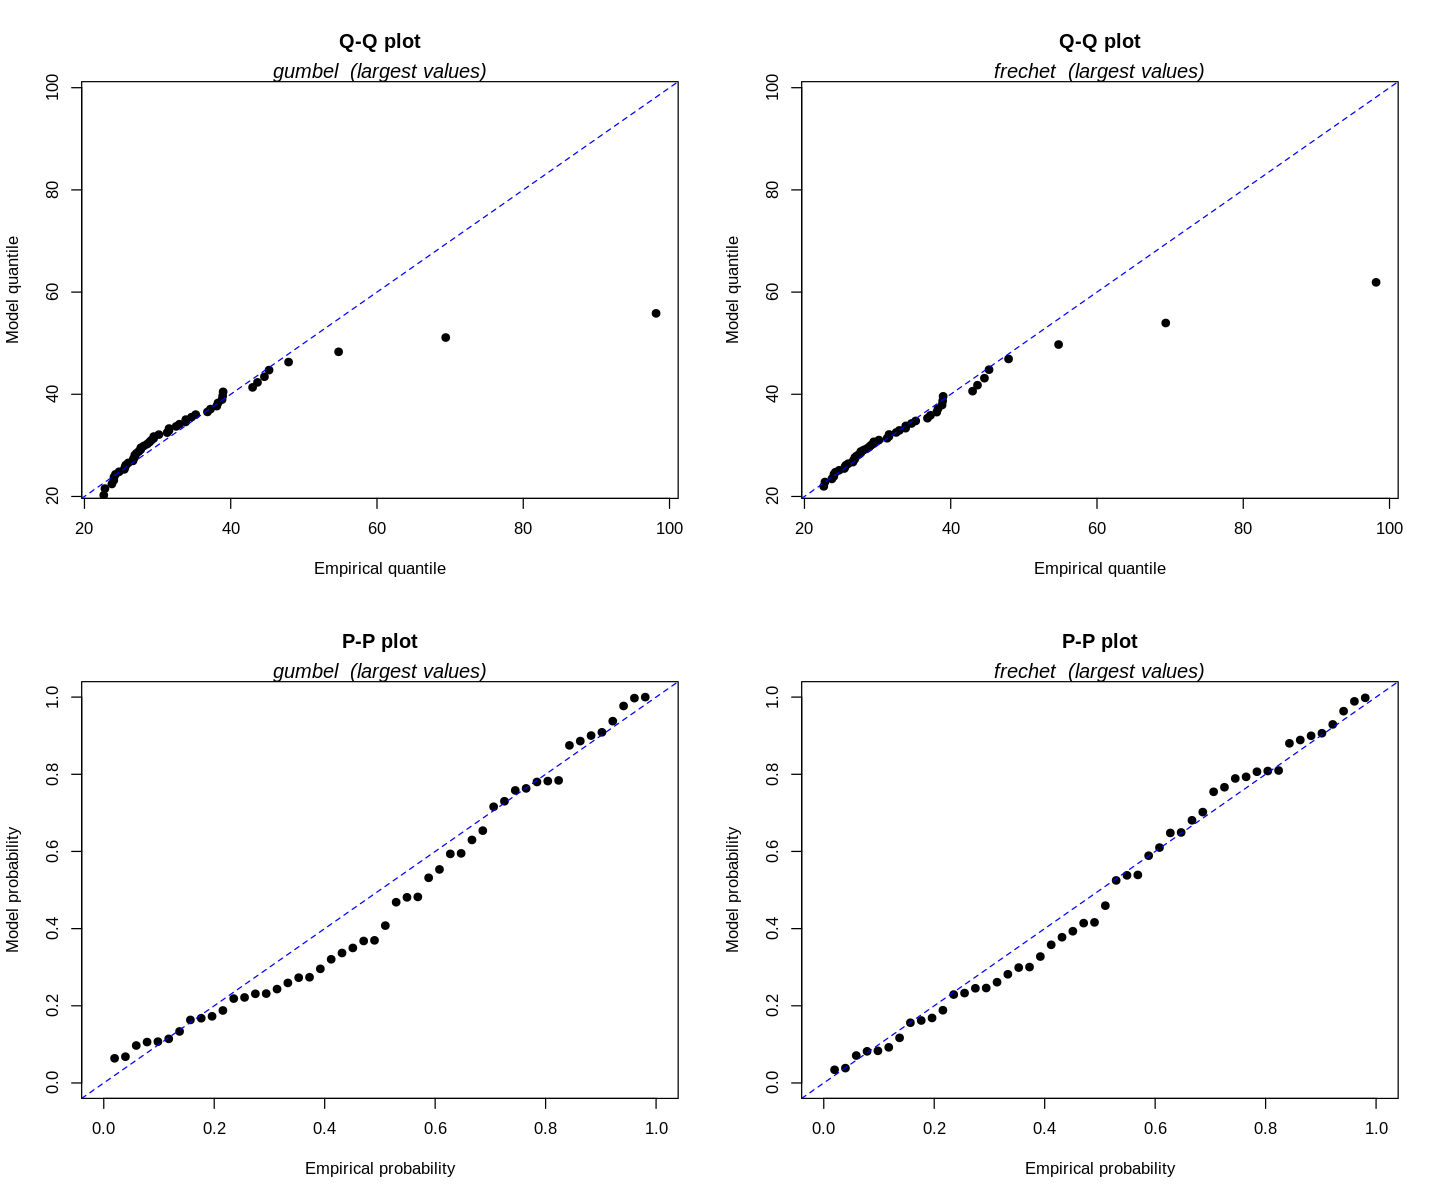

In [ ]:
##diagnostics
#q-q and p-p plot for Gumbel and Fréchet distribution
options(repr.plot.width=12, repr.plot.height=10)
par(mfrow=c(2, 2))
QQplot(values=evobs, mu=muG, sigma=sigmaG, dist="gumbel")
QQplot(values=evobs, mu=muF, sigma=sigmaF, dist="frechet")
PPplot(values=evobs, mu=muG, sigma=sigmaG, dist="gumbel")
PPplot(values=evobs, mu=muF, sigma=sigmaF, dist="frechet")

In [ ]:
##fit GEV distribution (largest values) to data
gevmod <- fevd(x=evobs, units="Wind speed (mph)", period.basis="year",
               type="GEV", method="MLE")
gevmod
#extract MLEs (these are needed for the remaining part of the analysis)
muGev <- gevmod$results$par[1]
sigmaGev <- gevmod$results$par[2]
xiGev <- gevmod$results$par[3]


fevd(x = evobs, type = "GEV", method = "MLE", units = "Wind speed (mph)", 
    period.basis = "year")

[1] "Estimation Method used: MLE"


 Negative Log-Likelihood Value:  171.9005 


 Estimated parameters:
  location      scale      shape 
28.0948377  5.0647361  0.4200684 

 Standard Error Estimates:
 location     scale     shape 
0.8390910 0.7623297 0.1498658 

 Estimated parameter covariance matrix.
            location        scale        shape
location  0.70407371  0.457742483 -0.041025454
scale     0.45774248  0.581146505 -0.001974841
shape    -0.04102545 -0.001974841  0.022459765

 AIC = 349.8011 

 BIC = 355.5371 

REMEMBER: the parameters for the Frechet will be

$\text{scale }\color{red}\sigma=\exp(\text{Intercept})=\exp( 3.3579367)= 28.72985.$

$\text{shape }\color{red}\xi=\frac 1 {\text{logsigma}}=\frac 1{ 0.1957559 }= 5.10840.$

fevd(x = evobs, type = "GEV", method = "MLE", units = "Wind speed (mph)", 
    period.basis = "year")

[1] "Normal Approx."

         95% lower CI   Estimate 95% upper CI
location   26.4502495 28.0948377    29.739426
scale       3.5705975  5.0647361     6.558875
shape       0.1263368  0.4200684     0.713800



 Preparing to calculate  95 % CI for  location parameter 

 Model is   fixed 

 Using Profile Likelihood Method.

 Calculating profile likelihood.  This may take a few moments.

 Profile likelihood has been calculated.  Now, trying to find where it crosses the critical value =  -173.8213 


fevd(x = evobs, type = "GEV", method = "MLE", units = "Wind speed (mph)", 
    period.basis = "year")

[1] "Profile Likelihood"

[1] "location: 28.095"

[1] "95% Confidence Interval: (26.5846, 29.9057)"


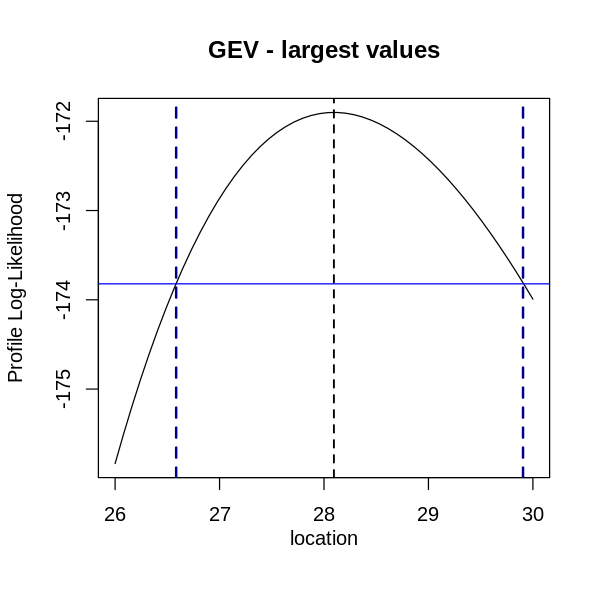

In [ ]:
options(repr.plot.width=5, repr.plot.height=5)

##confidence intervals for MLEs of GEV model
#normal-approximation confidence intervals
ci(gevmod, alpha=.05, type="parameter", method="normal")

#likelihood based confidence intervals
#mu (=location)
ci(gevmod, alpha=.05, which.par=1, type="parameter", method="proflik",
   xrange=c(26,30), nint=50, verbose=TRUE, main="GEV - largest values")


 Preparing to calculate  95 % CI for  scale parameter 

 Model is   fixed 

 Using Profile Likelihood Method.

 Calculating profile likelihood.  This may take a few moments.

 Profile likelihood has been calculated.  Now, trying to find where it crosses the critical value =  -173.8213 


fevd(x = evobs, type = "GEV", method = "MLE", units = "Wind speed (mph)", 
    period.basis = "year")

[1] "Profile Likelihood"

[1] "scale: 5.065"

[1] "95% Confidence Interval: (3.7954, 6.8622)"


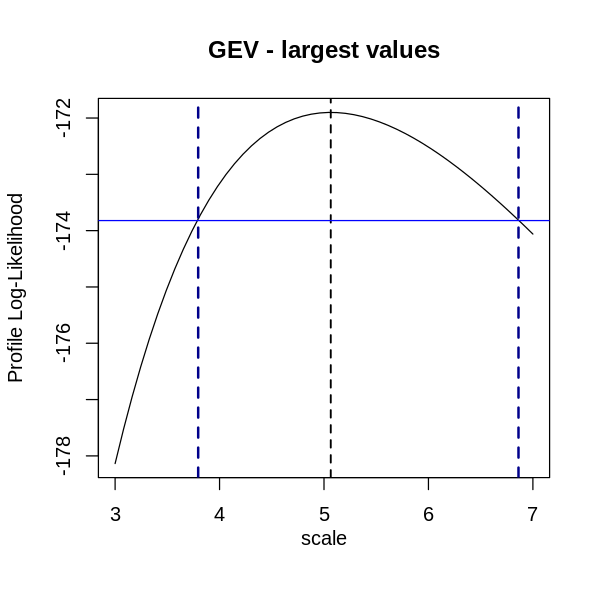

In [ ]:
options(repr.plot.width=5, repr.plot.height=5)
#sigma (=scale)
ci(gevmod, alpha=.05, which.par=2, type="parameter", method="proflik",
   xrange=c(3,7), nint=50, verbose=TRUE, main="GEV - largest values")


 Preparing to calculate  95 % CI for  shape parameter 

 Model is   fixed 

 Using Profile Likelihood Method.

 Calculating profile likelihood.  This may take a few moments.

 Profile likelihood has been calculated.  Now, trying to find where it crosses the critical value =  -173.8213 


fevd(x = evobs, type = "GEV", method = "MLE", units = "Wind speed (mph)", 
    period.basis = "year")

[1] "Profile Likelihood"

[1] "shape: 0.42"

[1] "95% Confidence Interval: (0.1694, 0.7552)"


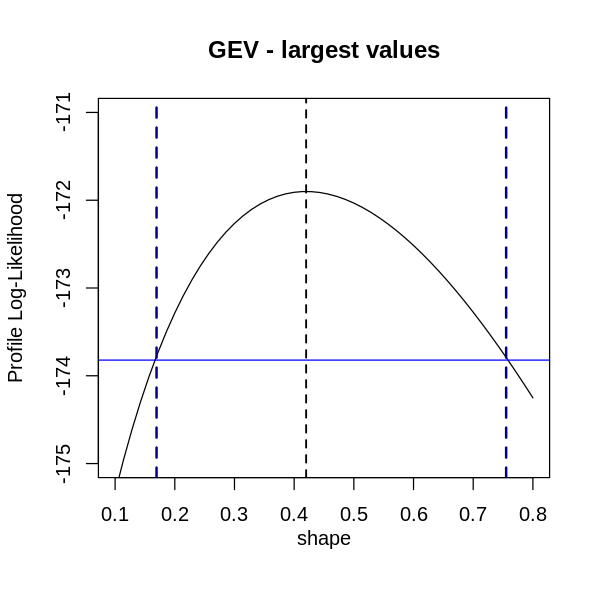

In [ ]:
options(repr.plot.width=5, repr.plot.height=5)
#xi (=shape)
ci(gevmod, alpha=.05, which.par=3, type="parameter", method="proflik",
   xrange=c(.1,.8), nint=50, verbose=TRUE, main="GEV - largest values",
   ylim=c(-175,-171)) #change range of the y-axis

Relationship between GEV model and Gumbel/Weibull/Fréchet distribution: obtain parameters of Gumbel, Weibull, and Fréchet model from GEV model see Castillo et al., p. 200

In [ ]:
#xi = 0: GEV model fitted a Gumbel distribution
parmsGumbel <- c(muGev, sigmaGev)
names(parmsGumbel) <- c("Mu", "Sigma")
parmsGumbel #GEV model's estimates of the Gumbel distribution
#compare with Gumbel model
fevd(x=evobs, type="Gumbel", method="MLE")$results$par

Mu     Sigma 
28.094838  5.064736

location     scale 
29.448377  6.728403

In [ ]:
#xi > 0: GEV model fitted a Fréchet distribution

parmsFrechet <- c(log(sigmaGev/xiGev), xiGev, muGev-sigmaGev/xiGev)

names(parmsFrechet) <- c("Mu", "Sigma", "Gamma")

parmsFrechet #GEV model's estimates of the Fréchet distribution

#compare with Fréchet model

gamma <- parmsFrechet[3] #threshold parameter of Fréchet distribution

Lifedata.MLE(Surv(evobs-gamma) ~ 1, dist="frechet")

Mu      Sigma      Gamma 
 2.4896398  0.4200684 16.0379058

Call:
model.frame(formula = Surv(evobs - gamma) ~ 1)

Coefficients:
(Intercept)    logsigma 
   2.489640    0.420069 

Loglikelihod:
-171.9005 (df=2)

In [ ]:
#xi < 0: GEV model fitted a Weibull distribution
parmsWeibull <- c(log(sigmaGev/-xiGev), -xiGev, muGev-sigmaGev/xiGev)
names(parmsWeibull) <- c("Mu", "Sigma", "Gamma")
parmsWeibull #GEV model's estimates of the Weibull distribution
#compare with Weibull model
gamma <- parmsWeibull[3] #threshold parameter of Weibull distribution
# survreg(Surv(gamma-evobs) ~ 1, dist="weibull") scale NaN shape -0.420068402690865 location 16.0379057798877

Warning message in log(sigmaGev/-xiGev):
“NaNs produced”


Mu      Sigma      Gamma 
       NaN -0.4200684 16.0379058

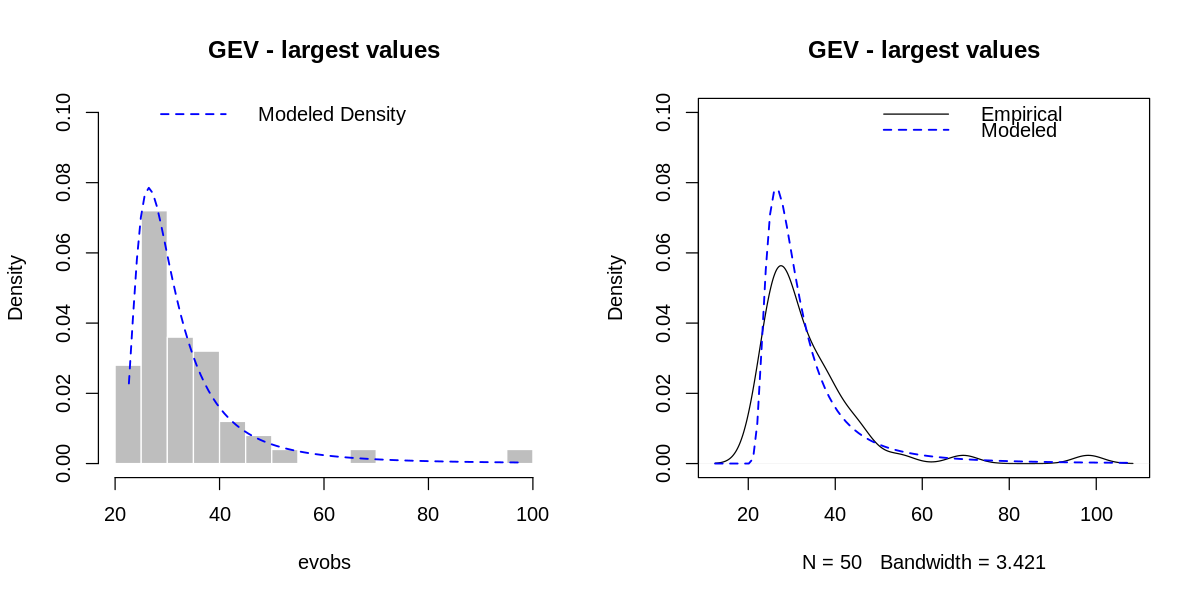

In [ ]:
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(1,2))

##diagnostics histogram of the data together with the density of the fitted GEV distribution
plot(gevmod, "hist", ylim=c(0,0.1), col="gray", main="GEV - largest values", border=F)
#density plot of the data together with the density of the fitted GEV distribution
plot(gevmod, "density", ylim=c(0,0.1), main="GEV - largest values")

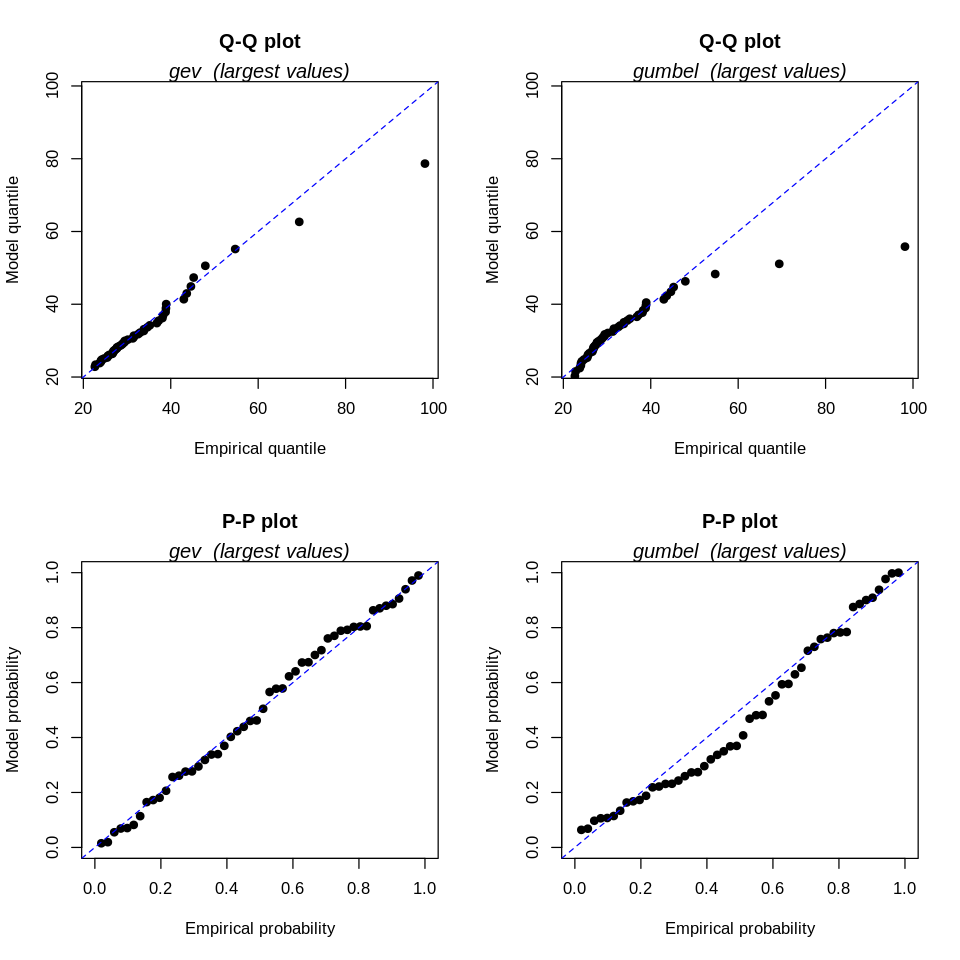

In [ ]:
#q-q and p-p plot for GEV (here: compare with Gumbel distribution)
options(repr.plot.width=8, repr.plot.height=8)
par(mfrow=c(2, 2))
QQplot(values=evobs, mu=muGev, sigma=sigmaGev, xi=xiGev, dist="gev")
QQplot(values=evobs, mu=muG, sigma=sigmaG, dist="gumbel")
PPplot(values=evobs, mu=muGev, sigma=sigmaGev, xi=xiGev, dist="gev")
PPplot(values=evobs, mu=muG, sigma=sigmaG, dist="gumbel")
par(mfrow=c(1, 1))#q-q and p-p plot for GEV (here: compare with Gumbel distribution)

Probability plot for GEV distribution (here: compare with Gumbel distribution)

The GEV model may display concave/convex behavior in the upper tail
this concave/convex behavior depends on the xi-parameter of the GEV model - if this parameter differs from zero, then the GEV model fitted either the Weibull distribution (convex upper tail), or the Fréchet distribution (concave upper tail) - if this xi-parameter is very close to zero, then the GEV model fitted a Gumbel distribution, and no concave/convex upper tail will show up


	Likelihood-ratio Test

data:  evobsevobs
Likelihood-ratio = 14.781, chi-square critical value = 3.8415, alpha =
0.0500, Degrees of Freedom = 1.0000, p-value = 0.0001208
alternative hypothesis: greater


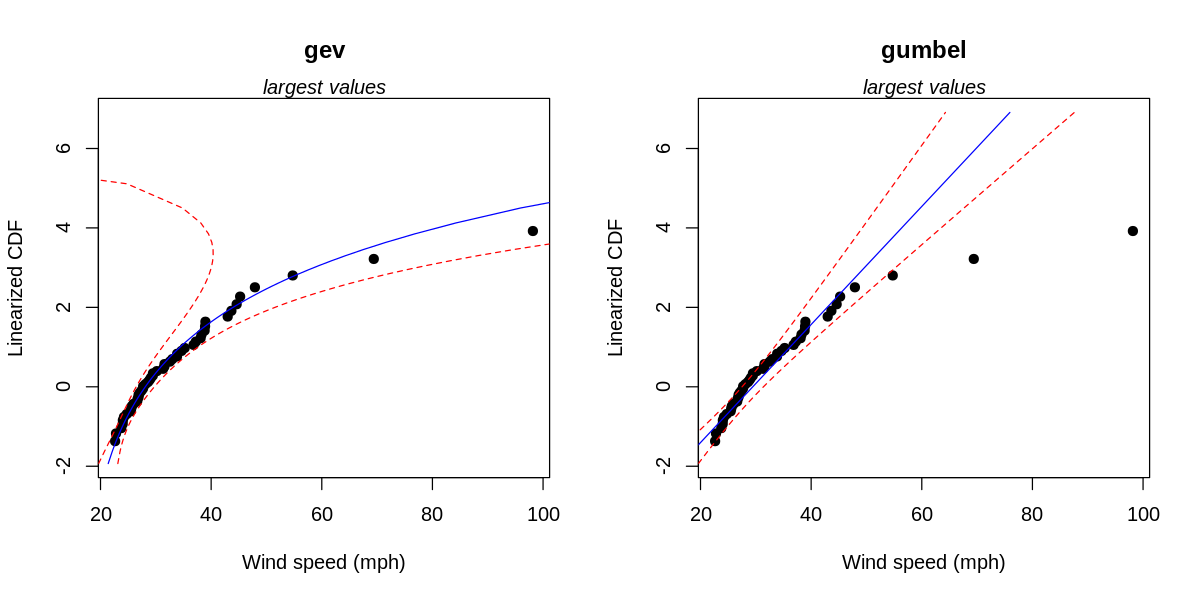

In [ ]:
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(1, 2))
probplot(values=evobs, model=gevmod, varname="Wind speed (mph)",
         alpha=1-.95, dist="gev")
probplot(values=evobs, model=gumbelmod, varname="Wind speed (mph)",
         alpha=1-.95, dist="gumbel")
par(mfrow=c(1, 1))

#compare GEV and Gumbel model with likelihood-ratio test
gummod <- fevd(x=evobs, units="Wind speed (mph)", type="Gumbel", method="MLE")
lr.test(gevmod, gummod)

for the wind speed data, it is also interesting to compare the
probability plot of the GEV model with that of the Fréchet model

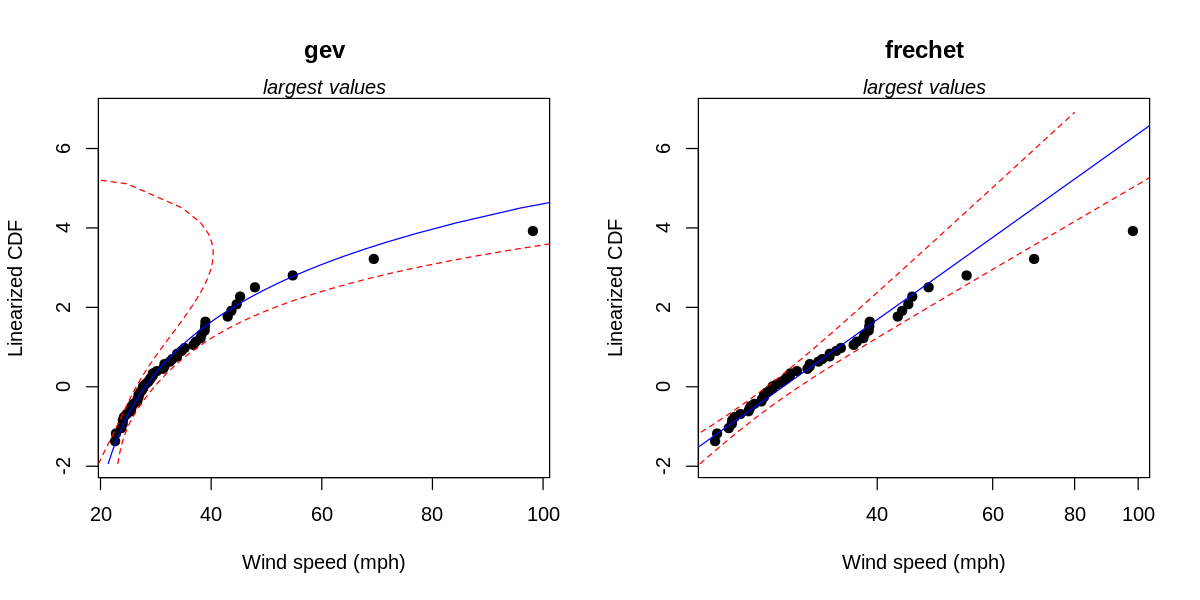

In [ ]:
par(mfrow=c(1, 2))
options(repr.plot.width=10, repr.plot.height=5)
probplot(values=evobs, model=gevmod, varname="Wind speed (mph)",
         alpha=1-.95, dist="gev")
probplot(values=evobs, model=frechetmod, varname="Wind speed (mph)",
         alpha=1-.95, dist="frechet")
par(mfrow=c(1, 1))

Note that in the Fréchet probability plot on the right, the observed data points show signs of concave behavior in the upper tail this concave behavior in the upper tail suggests that the fit of the Fréchet distribution could be improved by adding a threshold parameter to the Fréchet model the blue line of fitted GEV model on the left, on the other hand,"bends towards" these observations in the upper tail the reason for this bending behavior is that the fitted GEV model is actually similar to a Fréchet model with a threshold parameter included (which is also called a three-parameter Fréchet model)

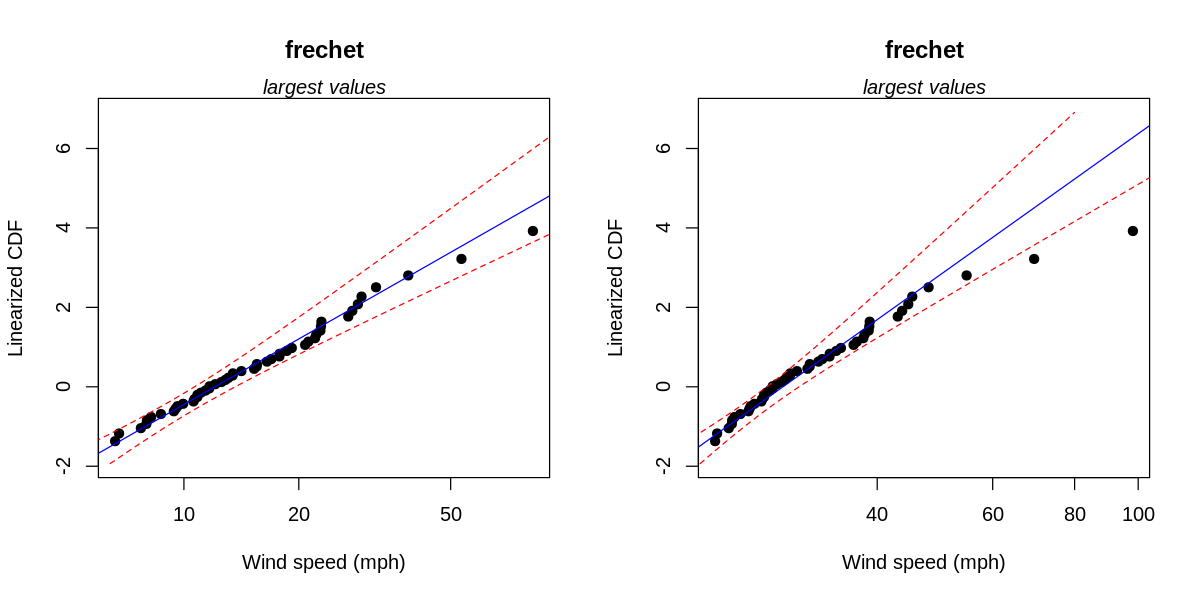

In [ ]:
#obtain the Fréchet threshold parameter (=gamma) from the fitted GEV model
#(see Castillo et al., p. 200; see also Coles, p. 56)
gamma <- muGev-sigmaGev/xiGev
#fit the Fréchet model including the threshold parameter
frechetmodG <- Lifedata.MLE(Surv(evobs-gamma) ~ 1, dist="frechet")

#fitting a Fréchet model including the correct threshold parameter
#should linearize the Fréchet probability plot, which can be seen as follows:

#Fréchet probability plot of model with (left) and without (right) threshold
par(mfrow=c(1, 2))
options(repr.plot.width=10, repr.plot.height=5)
probplot(values=evobs-gamma, model=frechetmodG,
         varname="Wind speed (mph)", alpha=1-.95, dist="frechet")
probplot(values=evobs, model=frechetmod, varname="Wind speed (mph)",
         alpha=1-.95, dist="frechet")
par(mfrow=c(1, 1))

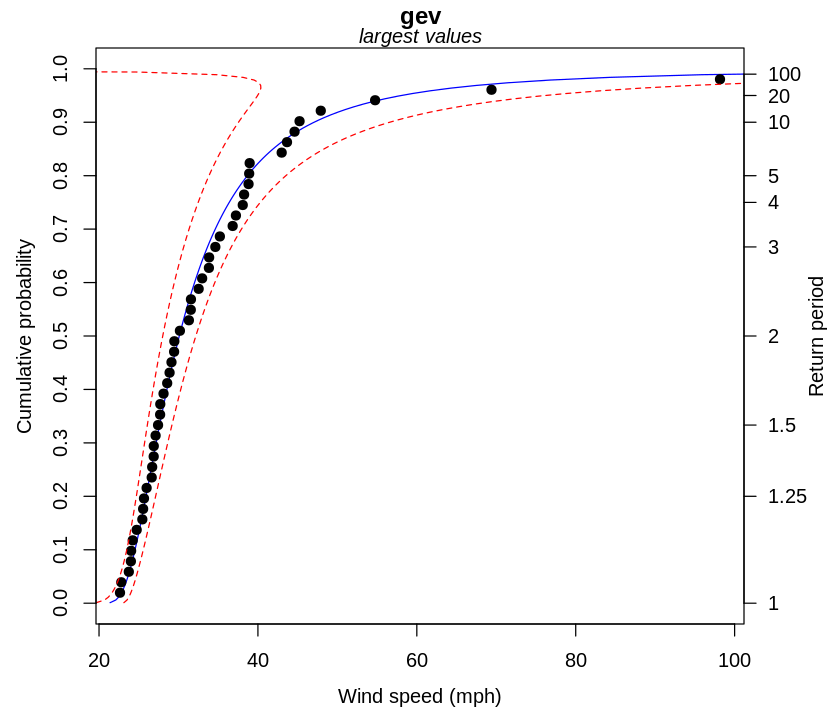

In [ ]:
##cumulative probability plot for GEV model (including return period)
#GEV distribution (largest values)
options(repr.plot.width=7, repr.plot.height=6)
cprobplot(values=evobs, model=gevmod, varname="Wind speed (mph)",
          alpha=1-.95, dist="gev")

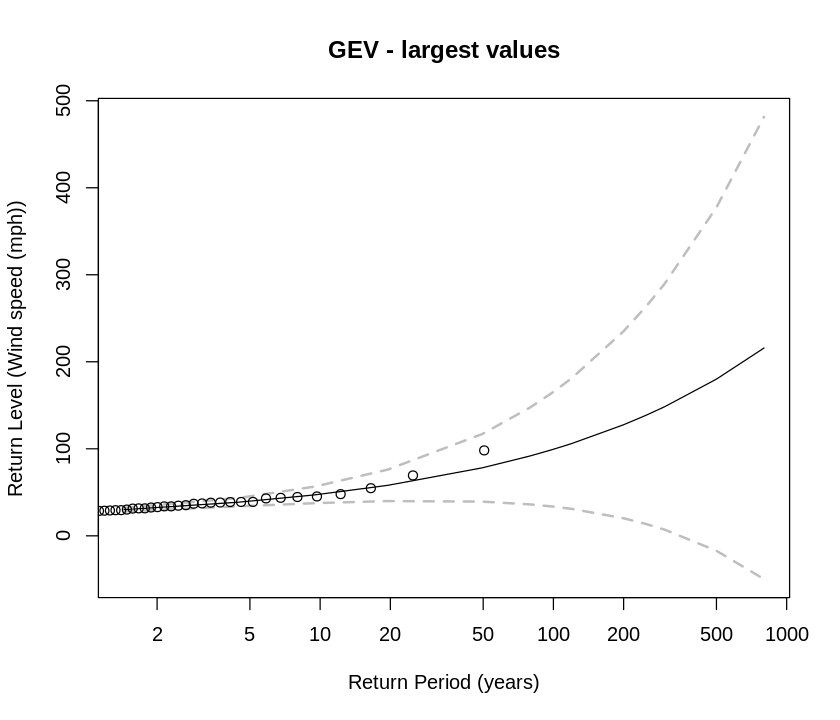

In [ ]:
#return period versus return level
options(repr.plot.width=7, repr.plot.height=6)
plot(gevmod, "rl", main="GEV - largest values")

fevd(x = evobs, type = "GEV", method = "MLE", units = "Wind speed (mph)", 
    period.basis = "year")

[1] "Normal Approx."

[1] "99.9999999999999-year return level: 99.302"

[1] "95% Confidence Interval: (33.622, 164.9819)"



 Preparing to calculate  95 % CI for  99.9999999999999-year return level 

 Model is   fixed 

 Using Profile Likelihood Method.

 Calculating profile likelihood.  This may take a few moments.

 Profile likelihood has been calculated.  Now, trying to find where it crosses the critical value =  -173.8213 


fevd(x = evobs, type = "GEV", method = "MLE", units = "Wind speed (mph)", 
    period.basis = "year")

[1] "Profile Likelihood"

[1] "99.9999999999999-year return level: 99.302"

[1] "95% Confidence Interval: (63.6266, 142.9386)"


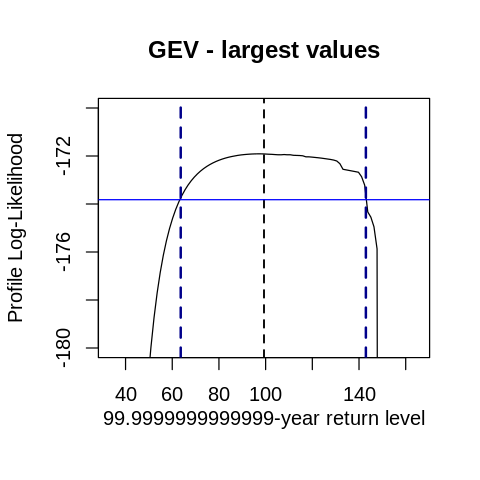

In [ ]:
##likelihood based intervals for return levels (GEV model)
#in case of the GEV model, the normal-approximation confidence intervals for the
#return level can be unrealistically wide, especially in the tails
#(see, for instance, the probability and cumulative probability plot of the GEV model)
#likelihood based intervals, on the other hand, yield more realistic intervals

#specify cumulative probability
cumProb <- .99
returnPeriod <- 1/(1-cumProb) #return period = 1/(1-cumulative probability)

#normal-approximation confidence interval
(ciRetperN <- ci(gevmod, type="return.level", return.period=returnPeriod,
                 method="normal", alpha=.05))

#likelihood based confidence interval
options(repr.plot.width=4, repr.plot.height=4)
ci(gevmod, type="return.level", return.period=returnPeriod,
   main="GEV - largest values",
   method="proflik", alpha=.05, nint=100,
   xrange=c(ciRetperN[1], ciRetperN[3]), verbose=TRUE,
   ylim=c(-180,-170)) #change range of the y-axis